In [1]:
import sys

import numpy as np
import matplotlib.pyplot as plt

import rose

plt.style.use('science')
gr = (1 + np.sqrt(5)) / 2
h = 3

In [2]:
energy = 50 # MeV
theta = np.array([200, -91.85])
training_points = np.array([
    [119.51219512195122, -14.634146341463415],
    [139.02439024390245, -4.878048780487805],
    [158.53658536585365, -48.78048780487805],
    [178.0487804878049, -117.07317073170732],
    [197.5609756097561, -131.70731707317074],
    [217.0731707317073, -126.82926829268293],
    [236.58536585365854, -82.92682926829268],
    [256.0975609756098, -175.609756097561],
    [275.609756097561, -19.51219512195122],
    [295.1219512195122, -170.73170731707316]
])

In [3]:
s_mesh = np.linspace(1e-6, 4*2*np.pi, 2000)

rbe = rose.ReducedBasisEmulator(
    rose.interaction.Optical_Potential,
    training_points,
    energy,
    0,
    n_basis = 4
)

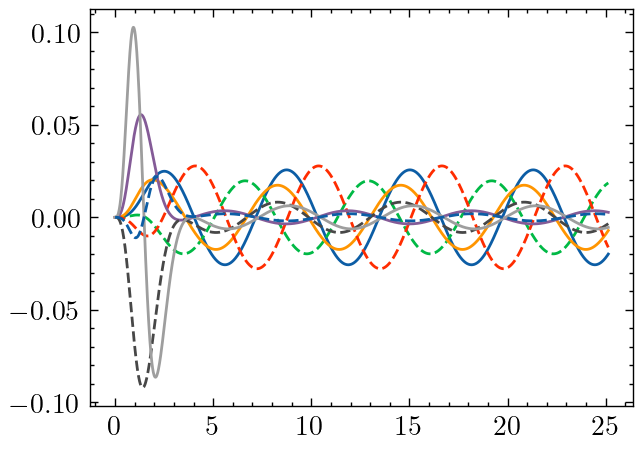

In [4]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')

for row in rbe.basis.vectors.T:
    ax.plot(rbe.s_mesh, np.real(row))
    ax.plot(rbe.s_mesh, np.imag(row), linestyle='--')

In [5]:
%%time
phi_hat = rbe.emulate_wave_function(theta)

CPU times: user 550 µs, sys: 667 µs, total: 1.22 ms
Wall time: 1.09 ms


In [8]:
%%time
phi_exact = rbe.se.phi(energy, theta, rbe.s_mesh, 0, solve_se_dict=dict(phi_0=0+0j, phi_prime_0=1+0j))

CPU times: user 105 ms, sys: 3.52 ms, total: 109 ms
Wall time: 107 ms


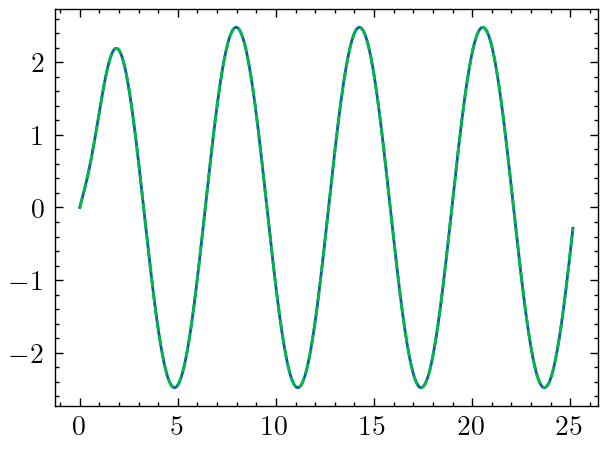

In [9]:
fig, ax = plt.subplots(dpi=200)
fig.patch.set_facecolor('white')
ax.plot(rbe.s_mesh, np.real(phi_hat))
ax.plot(rbe.s_mesh, np.real(phi_exact), linestyle='--');

In [10]:
# rose.metrics.run_metrics(rbe, 'benchmark_data_MN_Potential_E_50.00_MeV.pkl', verbose=True);

In [11]:
%%time
rbe.emulate_phase_shift(theta)

CPU times: user 245 µs, sys: 72 µs, total: 317 µs
Wall time: 284 µs


(-0.11565963165418841-5.0306980803327406e-17j)

In [12]:
%%time
rose.free_solutions.phase_shift_interp(np.real(rbe.emulate_wave_function(theta)), rbe.s_mesh, 0, rbe.s_0)

CPU times: user 1.55 ms, sys: 1.6 ms, total: 3.15 ms
Wall time: 3.58 ms


(-0.11565963145127808-1.734723475976807e-17j)

In [14]:
%%time
rose.free_solutions.phase_shift_interp(np.real(rbe.se.phi(energy, theta, rbe.s_mesh, 0,
    solve_se_dict=dict(phi_0=0+0j, phi_prime_0=1+0j))), rbe.s_mesh, 0, rbe.s_0)

CPU times: user 116 ms, sys: 3.45 ms, total: 120 ms
Wall time: 118 ms


(-0.11566308658051472-2.0816681711721685e-17j)

In [15]:
rbe.basis.singular_values

array([3.80663543e+02, 5.20634528e+01, 1.16228610e+00, 1.04830663e-01,
       4.28958973e-03, 8.90166539e-04, 5.18381825e-05, 1.42453229e-06,
       3.65021085e-07, 1.62085794e-08])